In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import pickle

In [2]:
df = pd.read_csv('bbc-text.csv')

In [3]:
df.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [4]:
df['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [5]:
df.category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

<AxesSubplot:xlabel='category', ylabel='count'>

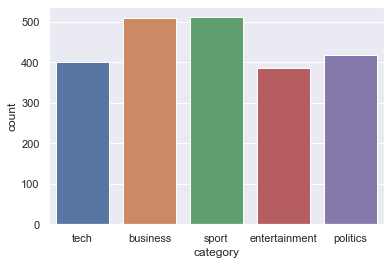

In [6]:
sns.countplot(df.category)

In [7]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df.category = lb.fit_transform(df.category)

In [8]:
df.head(10)

,category,text
0,4,tv future in the hands of viewers with home th...
1,0,worldcom boss left books alone former worldc...
2,3,tigers wary of farrell gamble leicester say ...
3,3,yeading face newcastle in fa cup premiership s...
4,1,ocean s twelve raids box office ocean s twelve...
5,2,howard hits back at mongrel jibe michael howar...
6,2,blair prepares to name poll date tony blair is...
7,3,henman hopes ended in dubai third seed tim hen...
8,3,wilkinson fit to face edinburgh england captai...
9,1,last star wars not for children the sixth an...


In [9]:
corpus = []
ps = PorterStemmer()

for i in range(0,df.shape[0]):

  # Cleaning special character from the message
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df.text[i])

  # Converting the entire message into lower case
  message = message.lower()

  # Tokenizing the review by words
  words = message.split()

  # Removing the stop words
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  message = ' '.join(words)

  # Building a corpus of messages
  corpus.append(message)

In [10]:
y = df['category'].values

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
X = cv.fit_transform(corpus).toarray()

In [12]:
pickle.dump(cv,open('cv.pkl','wb'))

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
model=MultinomialNB()
model.fit(X_train,Y_train)

MultinomialNB()

In [38]:
pred=model.predict(X_test)


In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,pred)

0.9640449438202248

In [40]:
pickle.dump(model,open('model.pkl','wb'))

In [41]:
txt = ["Women have made great strides in sports"]
vect = cv.transform(txt).toarray()
mypredict = lb.classes_[(model.predict(vect))]
mypredict[0]


'sport'

In [42]:
txt = ["The United States has started an investigation into the role of Pakistanis in the Islamic State movement in Syria, complicating the situation for Prime Minister Imran Khan who is still to emerge from Tuesday’s setback to his attempt to get two “critical” FATF-linked legislations enacted, people familiar with the matter said."]
vect = cv.transform(txt).toarray()
mypredict = lb.classes_[(model.predict(vect))]
mypredict

array(['politics'], dtype=object)

In [43]:
txt = ["On June 9, Karnataka health education minister posted an infographic on Twitter showing Covid-19 infections and deaths in the city of Bengaluru were running about half the rate in New Zealand, a country acclaimed globally for reining in the disease"]
vect = cv.transform(txt).toarray()
mypredict = lb.classes_[(model.predict(vect))]
mypredict

array(['business'], dtype=object)

In [44]:
txt = ["Telecom consumer base in the country dipped to around 116.36 crore in May but service providers were able to narrow the loss of subscriber base to 57.6 lakh as compared to the previous month, according to data released by the sector regulator Trai on Wednesday"]

vect = cv.transform(txt).toarray()
mypredict = lb.classes_[(model.predict(vect))]
mypredict

array(['business'], dtype=object)

In [46]:
txt = ['Manchester United goalkeeper Dean Henderson has signed a new contract which will keep him at Old Trafford until 2025, with the option to extend for a further year, the Premier League club said on Wednesday.The 23-year-old spent two seasons on loan at Sheffield United, helping them earn promotion from the second tier Championship in the 2018-19 campaign before keeping 13 clean sheets in the Premier League last season.Financial details of the contract were not disclosed but British media reported Henderson will earn about 120,000 pounds ($159,000) per week at United']
vect = cv.transform(txt).toarray()
mypredict = lb.classes_[(model.predict(vect))]
mypredict

array(['sport'], dtype=object)